In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/lab/house_sales.csv")

In [66]:
df.head()

,id,square_footage,no_bedroom,no_floors,no_bathrooms,sqft_above,sqft_living,price
0,1,2100000,3,3,2,12100000,3400000,120000
1,2,3100000,4,3,3,13100000,3500000,130000
2,3,2200000,3,2,2,12200000,6500000,120000
3,4,7700000,7,5,7,17700000,6700000,170000
4,5,3300000,5,4,3,13300000,7000000,133000


In [22]:
df.dtypes

square_footage     int64
no_bedroom         int64
no_floors          int64
no_bathrooms       int64
price             object
dtype: object

In [42]:
df.head(2)

,id,square_footage,no_bedroom,no_floors,no_bathrooms,price
0,1,2100000,3,3,2,"5,00,000"
1,2,3100000,4,3,3,"6,00,000"


In [43]:
df = df.drop(columns=['id'],axis=1)

In [44]:
df.describe()

,square_footage,no_bedroom,no_floors,no_bathrooms
count,9.000000e+00,9.000000,9.000000,9.000000
mean,4.422222e+06,4.888889,4.000000,4.111111
std,2.921805e+06,2.204793,1.658312,2.315407
min,1.000000e+06,2.000000,2.000000,2.000000
25%,2.200000e+06,3.000000,3.000000,2.000000
50%,3.300000e+06,5.000000,4.000000,3.000000
75%,6.000000e+06,6.000000,5.000000,6.000000
max,9.900000e+06,9.000000,7.000000,8.000000


In [45]:
df['floor'] = df['no_floors'].value_counts()

In [47]:
df['floor'].to_frame()

,floor
0,NaN
1,NaN
2,2.0
3,2.0
4,1.0
5,3.0
6,NaN
7,1.0
8,NaN


In [61]:
df.head()

,id,square_footage,no_bedroom,no_floors,no_bathrooms,sqft_above,price
0,1,2100000,3,3,2,12100000,120000
1,2,3100000,4,3,3,13100000,130000
2,3,2200000,3,2,2,12200000,120000
3,4,7700000,7,5,7,17700000,170000
4,5,3300000,5,4,3,13300000,133000


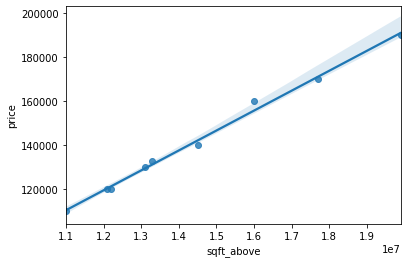

In [62]:
import seaborn as sns
ax = sns.regplot(x=df["sqft_above"], y=df["price"], data=df)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[['sqft_living']],df['price'])
df['price1']=lr.predict(df[['price']])
df['price1'].to_frame()

,price1
0,137989.748115
1,137989.748115
2,137989.748115
3,137989.748115
4,137989.748115
5,137989.748115
6,137989.748115
7,137989.748115
8,137989.748115


In [80]:
lr.score(df[['sqft_living']],df.price1)

0.0

In [81]:
df

,id,square_footage,no_bedroom,no_floors,no_bathrooms,sqft_above,sqft_living,price,price1
0,1,2100000,3,3,2,12100000,3400000,137989.748110,137989.748115
1,2,3100000,4,3,3,13100000,3500000,137989.748113,137989.748115
2,3,2200000,3,2,2,12200000,6500000,137989.748110,137989.748115
3,4,7700000,7,5,7,17700000,6700000,137989.748123,137989.748115
4,5,3300000,5,4,3,13300000,7000000,137989.748113,137989.748115
5,6,1000000,2,2,2,11000000,8700000,137989.748108,137989.748115
6,7,9900000,9,7,8,19900000,6954000,137989.748128,137989.748115
7,8,6000000,6,5,6,16000000,4340000,137989.748120,137989.748115
8,9,4500000,5,5,4,14500000,3440000,137989.748115,137989.748115


In [83]:
lr.fit(df[['sqft_living','no_bedroom','no_floors','no_bathrooms','sqft_above','square_footage']],df['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print("price =",lr.predict([[2300000,4,3,4,12200000,2200000]]))

price = [137989.74811305]


In [92]:
print("R-squared value=",lr.score(df[['sqft_living','no_bedroom','no_floors','no_bathrooms','sqft_above','square_footage']],df['price']))

R-squared value= 0.9983291409811402


In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
input = [('poly',PolynomialFeatures(degree=2)),('mode',LinearRegression())]
pipe = Pipeline(input)
pipe.fit(df[['sqft_living','no_bedroom','no_floors','no_bathrooms','sqft_above','square_footage']],df['price'])
print("R-squared value=",pipe.score(df[['sqft_living','no_bedroom','no_floors','no_bathrooms','sqft_above','square_footage']],df['price']))

R-squared value= 1.0


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
x = df[['sqft_living','no_bedroom','no_floors','no_bathrooms','sqft_above','square_footage']]
y = df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x,y)
print("R-aquared vall=",RidgeModel.score(x,y))

R-aquared vall= 0.9982510729201565


In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(x_train)
poly_y = poly.fit_transform(x_test)
ridge = Ridge(alpha=0.1)
ridge.fit(poly_x,y_train)
print("R-squared val=",ridge.score(poly_y,y_test))

R-squared val= 0.796420147823475


/Users/vishalbarad/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
